# Lab 6 - Pattern Mining


**TO DO:
Verify comments bellow the SelectKBest and fix for the report**

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [20]:
import pandas as pd, numpy as np
from mlxtend.frequent_patterns import apriori, association_rules #for ARM
from sklearn.feature_selection import SelectKBest, f_classif
from utils import graphFunctions as graph
import matplotlib.pyplot as plt

In [3]:
data_9: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation_9.csv', sep=',', decimal='.', index_col='id')
df_target = data_9.iloc[:, data_9.shape[1]-1]
y_9: np.ndarray = data_9.pop('class').values
X_9: np.ndarray = data_9.values
labels_9 = pd.unique(y_9)

data_9.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,meanHarmToNoiseHarmonicity,...,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.626765,...,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.008863,0.098628,0.031079,0.218287
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.577781,...,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.022440,0.040204,0.058074,0.017145
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.665577,...,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.204655,0.120303,0.125812,0.028947
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.775315,...,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.002275,0.009216,0.015696,0.216241
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.314902,...,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.018696,0.010267,0.090744,0.662076


In [4]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_9, y_9)
# tecnicas nao supervisionadas nao devem utilizar a classe ==> simular que nao tem classe (sera pior dos que os casos de classificações justamente por não usar a informação da classe, mas eh util para casos onde a classe nao existe)
# ver quantidade e qualidade dos padroes (com graficos)

print('Shape before feature selection:', X_9.shape)
print('Shape after feature selection:', X_new.shape)

X_new

Shape before feature selection: (376, 350)
Shape after feature selection: (376, 10)


array([[0.69939031, 0.29335769, 0.36829191, ..., 0.3449435 , 0.26159742,
        0.34512721],
       [0.70387003, 0.1356912 , 0.25061078, ..., 0.43332698, 0.3703697 ,
        0.56096346],
       [0.33127886, 0.18803313, 0.2683551 , ..., 0.09554348, 0.69689129,
        0.71519216],
       ...,
       [0.75998743, 0.2337674 , 0.24555083, ..., 0.48092847, 0.45551334,
        0.62350203],
       [0.3105217 , 0.35779378, 0.33035315, ..., 0.33088337, 0.8072876 ,
        0.73873264],
       [0.55351314, 0.0927367 , 0.16032023, ..., 0.22123252, 0.50641209,
        0.46210096]])

In [5]:
cols = selector.get_support(indices=True)

selected_df = data_9.iloc[:, cols].join(df_target)
selected_df.head()

,mean_MFCC_2nd_coef,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,tqwt_entropy_shannon_dec_17,tqwt_entropy_log_dec_12,class
id,,,,,,,,,,,
0,0.699390,0.293358,0.368292,0.111645,0.529850,0.290614,0.210843,0.344943,0.261597,0.345127,1.0
1,0.703870,0.135691,0.250611,0.260413,0.139885,0.296079,0.248315,0.433327,0.370370,0.560963,1.0
2,0.331279,0.188033,0.268355,0.178849,0.195241,0.200090,0.072574,0.095543,0.696891,0.715192,1.0
3,0.434929,0.398089,0.210125,0.444707,0.331524,0.242596,0.143550,0.394110,0.752682,0.713601,1.0
4,0.750377,0.191724,0.265333,0.243838,0.319699,0.386515,0.278107,0.360543,0.109458,0.415387,1.0


## Discretize according to the size of the bins

In [6]:
newdf = selected_df.copy()
for col in newdf:
    if col not in ['class']: 
        newdf[col] = pd.cut(newdf[col],4,labels=['0','1','2','3'])
newdf.head(5)

,mean_MFCC_2nd_coef,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,tqwt_entropy_shannon_dec_17,tqwt_entropy_log_dec_12,class
id,,,,,,,,,,,
0,2,1,1,0,2,1,0,1,1,1,1.0
1,2,0,1,1,0,1,0,1,1,2,1.0
2,1,0,1,0,0,0,0,0,2,2,1.0
3,1,1,0,1,1,0,0,1,3,2,1.0
4,3,0,1,0,1,1,1,1,0,1,1.0


## Discretize according to the number of the elements per bins (similar to quartiles)

In [7]:
newdf_2 = selected_df.copy()
for col in newdf_2:
    if col not in ['class']: 
        newdf_2[col] = pd.qcut(newdf_2[col],4,labels=['0','1','2','3'])
newdf_2.head(5)

,mean_MFCC_2nd_coef,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,tqwt_entropy_shannon_dec_17,tqwt_entropy_log_dec_12,class
id,,,,,,,,,,,
0,3,2,3,0,3,2,1,2,0,0,1.0
1,3,1,1,2,0,2,2,3,1,1,1.0
2,1,1,2,1,1,0,0,0,2,2,1.0
3,1,3,1,3,2,1,0,2,2,2,1.0
4,3,1,2,1,2,2,2,2,0,0,1.0


## Dummify attributes

In [8]:
dummylist = []
for att in newdf:
    if att in ['class']: newdf[att] = newdf[att].astype('category')
    dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,mean_MFCC_2nd_coef_0,mean_MFCC_2nd_coef_1,mean_MFCC_2nd_coef_2,mean_MFCC_2nd_coef_3,std_6th_delta_0,std_6th_delta_1,std_6th_delta_2,std_6th_delta_3,std_7th_delta_0,std_7th_delta_1,...,tqwt_entropy_shannon_dec_17_0,tqwt_entropy_shannon_dec_17_1,tqwt_entropy_shannon_dec_17_2,tqwt_entropy_shannon_dec_17_3,tqwt_entropy_log_dec_12_0,tqwt_entropy_log_dec_12_1,tqwt_entropy_log_dec_12_2,tqwt_entropy_log_dec_12_3,class_0.0,class_1.0
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [9]:
dummylist = []
for att in newdf_2:
    if att in ['class']: newdf_2[att] = newdf_2[att].astype('category')
    dummylist.append(pd.get_dummies(newdf_2[[att]]))
dummified_df_2 = pd.concat(dummylist, axis=1)
dummified_df_2.head(5)

,mean_MFCC_2nd_coef_0,mean_MFCC_2nd_coef_1,mean_MFCC_2nd_coef_2,mean_MFCC_2nd_coef_3,std_6th_delta_0,std_6th_delta_1,std_6th_delta_2,std_6th_delta_3,std_7th_delta_0,std_7th_delta_1,...,tqwt_entropy_shannon_dec_17_0,tqwt_entropy_shannon_dec_17_1,tqwt_entropy_shannon_dec_17_2,tqwt_entropy_shannon_dec_17_3,tqwt_entropy_log_dec_12_0,tqwt_entropy_log_dec_12_1,tqwt_entropy_log_dec_12_2,tqwt_entropy_log_dec_12_3,class_0.0,class_1.0
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [10]:
def apriori_rules(dummified_df, minpaterns=10, minconf=0.9, minlengthrule=2, minsup=1):
    frequent_itemsets = {}
    while minsup>0:
        minsup = minsup*0.9
        frequent_itemsets = apriori(dummified_df, min_support=minsup, use_colnames=True)
        if len(frequent_itemsets) >= minpaterns:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf)
            rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
            if (len(rules[(rules['antecedent_len']>=minlengthrule)]) >= minpaterns):
                print("Minimum support:",minsup)
                break
    print("Number of found patterns:",len(frequent_itemsets))
    print("Number of found patterns with length greater or equal than", minlengthrule, ":",len(rules[(rules['antecedent_len']>=2)]))
    return rules[(rules['antecedent_len']>=minlengthrule)]

In [11]:
apriori_rules(dummified_df)

Minimum support: 0.34867844010000015
Number of found patterns: 43
Number of found patterns with length greater or equal than 2 : 10


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(std_7th_delta_0, std_8th_delta_0)",(std_6th_delta_0),0.396277,0.614362,0.361702,0.912752,1.485691,0.118245,4.420008,2
4,"(std_9th_delta_0, std_7th_delta_0)",(std_6th_delta_0),0.372340,0.614362,0.351064,0.942857,1.534694,0.122312,6.748670,2
5,"(std_11th_delta_0, std_7th_delta_0)",(std_6th_delta_0),0.396277,0.614362,0.364362,0.919463,1.496615,0.120905,4.788342,2
6,"(std_9th_delta_0, std_8th_delta_0)",(std_6th_delta_0),0.396277,0.614362,0.367021,0.926174,1.507539,0.123564,5.223646,2
7,"(std_6th_delta_0, std_8th_delta_0)",(std_11th_delta_0),0.430851,0.550532,0.393617,0.913580,1.659450,0.156420,5.200988,2
8,"(std_9th_delta_0, std_11th_delta_0)",(std_6th_delta_0),0.409574,0.614362,0.372340,0.909091,1.479732,0.120714,4.242021,2
9,"(std_11th_delta_0, std_7th_delta_0)",(std_8th_delta_0),0.396277,0.492021,0.361702,0.912752,1.855106,0.166726,5.822218,2
10,"(std_7th_delta_0, std_8th_delta_0)",(std_11th_delta_0),0.396277,0.550532,0.361702,0.912752,1.657945,0.143539,5.151596,2
11,"(std_9th_delta_0, std_11th_delta_0)",(std_8th_delta_0),0.409574,0.492021,0.372340,0.909091,1.847666,0.170821,5.587766,2
12,"(std_9th_delta_0, std_8th_delta_0)",(std_11th_delta_0),0.396277,0.550532,0.372340,0.939597,1.706708,0.154178,7.441194,2


When divided by equal sized bins, the rules created associate only the values from the first bin of the features related to std delta.

In [12]:
apriori_rules(dummified_df_2)

Minimum support: 0.16677181699666577
Number of found patterns: 129
Number of found patterns with length greater or equal than 2 : 52


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
2,"(std_7th_delta_3, std_8th_delta_3)",(std_6th_delta_3),0.194149,0.250000,0.180851,0.931507,3.726027,0.132314,10.950000,2
3,"(std_7th_delta_3, std_6th_delta_3)",(std_8th_delta_3),0.194149,0.250000,0.180851,0.931507,3.726027,0.132314,10.950000,2
4,"(std_6th_delta_3, std_8th_delta_3)",(std_7th_delta_3),0.194149,0.250000,0.180851,0.931507,3.726027,0.132314,10.950000,2
5,"(std_7th_delta_3, std_9th_delta_3)",(std_6th_delta_3),0.186170,0.250000,0.167553,0.900000,3.600000,0.121011,7.500000,2
6,"(std_6th_delta_3, std_9th_delta_3)",(std_7th_delta_3),0.178191,0.250000,0.167553,0.940299,3.761194,0.123005,12.562500,2
7,"(std_7th_delta_3, std_6th_delta_3)",(std_10th_delta_3),0.194149,0.250000,0.175532,0.904110,3.616438,0.126995,7.821429,2
8,"(std_7th_delta_3, std_10th_delta_3)",(std_6th_delta_3),0.191489,0.250000,0.175532,0.916667,3.666667,0.127660,9.000000,2
9,"(std_6th_delta_3, std_10th_delta_3)",(std_7th_delta_3),0.188830,0.250000,0.175532,0.929577,3.718310,0.128324,10.650000,2
10,"(std_7th_delta_3, std_6th_delta_3)",(class_1.0),0.194149,0.500000,0.180851,0.931507,1.863014,0.083777,7.300000,2
11,"(std_8th_delta_3, std_10th_delta_3)",(std_6th_delta_3),0.183511,0.250000,0.167553,0.913043,3.652174,0.121676,8.625000,2


When divided in quartiles, most of the rules created associate the values from the last quartile of the features related to std delta. But it's interesting to note that some of the rules have the class_1.0, so it can be useful to detect the target class.

## Testing with more bins

In [13]:
newdf = selected_df.copy()
for col in newdf:
    if col not in ['class','a01','a02']: 
        newdf[col] = pd.qcut(newdf[col],8,labels=range(8))

dummylist = []
for att in newdf:
    if att in ['class']: newdf[att] = newdf[att].astype('category')
    dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df_3 = pd.concat(dummylist, axis=1)

apriori_rules(dummified_df_3)

Minimum support: 0.08862938119652508
Number of found patterns: 167
Number of found patterns with length greater or equal than 2 : 44


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
8,"(std_7th_delta_7, std_6th_delta_7)",(class_1.0),0.093085,0.50000,0.093085,1.000000,2.000000,0.046543,inf,2
9,"(std_8th_delta_7, std_6th_delta_7)",(std_9th_delta_7),0.095745,0.12500,0.090426,0.944444,7.555556,0.078457,15.750000,2
10,"(std_8th_delta_7, std_6th_delta_7)",(class_1.0),0.095745,0.50000,0.095745,1.000000,2.000000,0.047872,inf,2
11,"(std_9th_delta_7, std_6th_delta_7)",(class_1.0),0.103723,0.50000,0.103723,1.000000,2.000000,0.051862,inf,2
12,"(std_10th_delta_7, std_6th_delta_7)",(class_1.0),0.098404,0.50000,0.098404,1.000000,2.000000,0.049202,inf,2
13,"(std_11th_delta_7, std_6th_delta_7)",(class_1.0),0.095745,0.50000,0.095745,1.000000,2.000000,0.047872,inf,2
14,"(std_12th_delta_7, std_6th_delta_7)",(class_1.0),0.093085,0.50000,0.093085,1.000000,2.000000,0.046543,inf,2
15,"(std_7th_delta_7, std_8th_delta_7)",(class_1.0),0.095745,0.50000,0.095745,1.000000,2.000000,0.047872,inf,2
16,"(std_7th_delta_7, std_10th_delta_7)",(class_1.0),0.090426,0.50000,0.090426,1.000000,2.000000,0.045213,inf,2
17,"(std_8th_delta_7, std_11th_delta_7)",(std_9th_delta_7),0.098404,0.12500,0.093085,0.945946,7.567568,0.080785,16.187500,2


Once again, the last bin indicate rules associated to the class = 1, which indicate that a high value for these features may be a warning for the Parkinson. We will verify it plotting some graphs below.

Besides that, we can see that a greater number of bins result in a lower minimum support, because of the higher number of possibilities for each feature, making each value less frequent.

<Figure size 432x288 with 0 Axes>

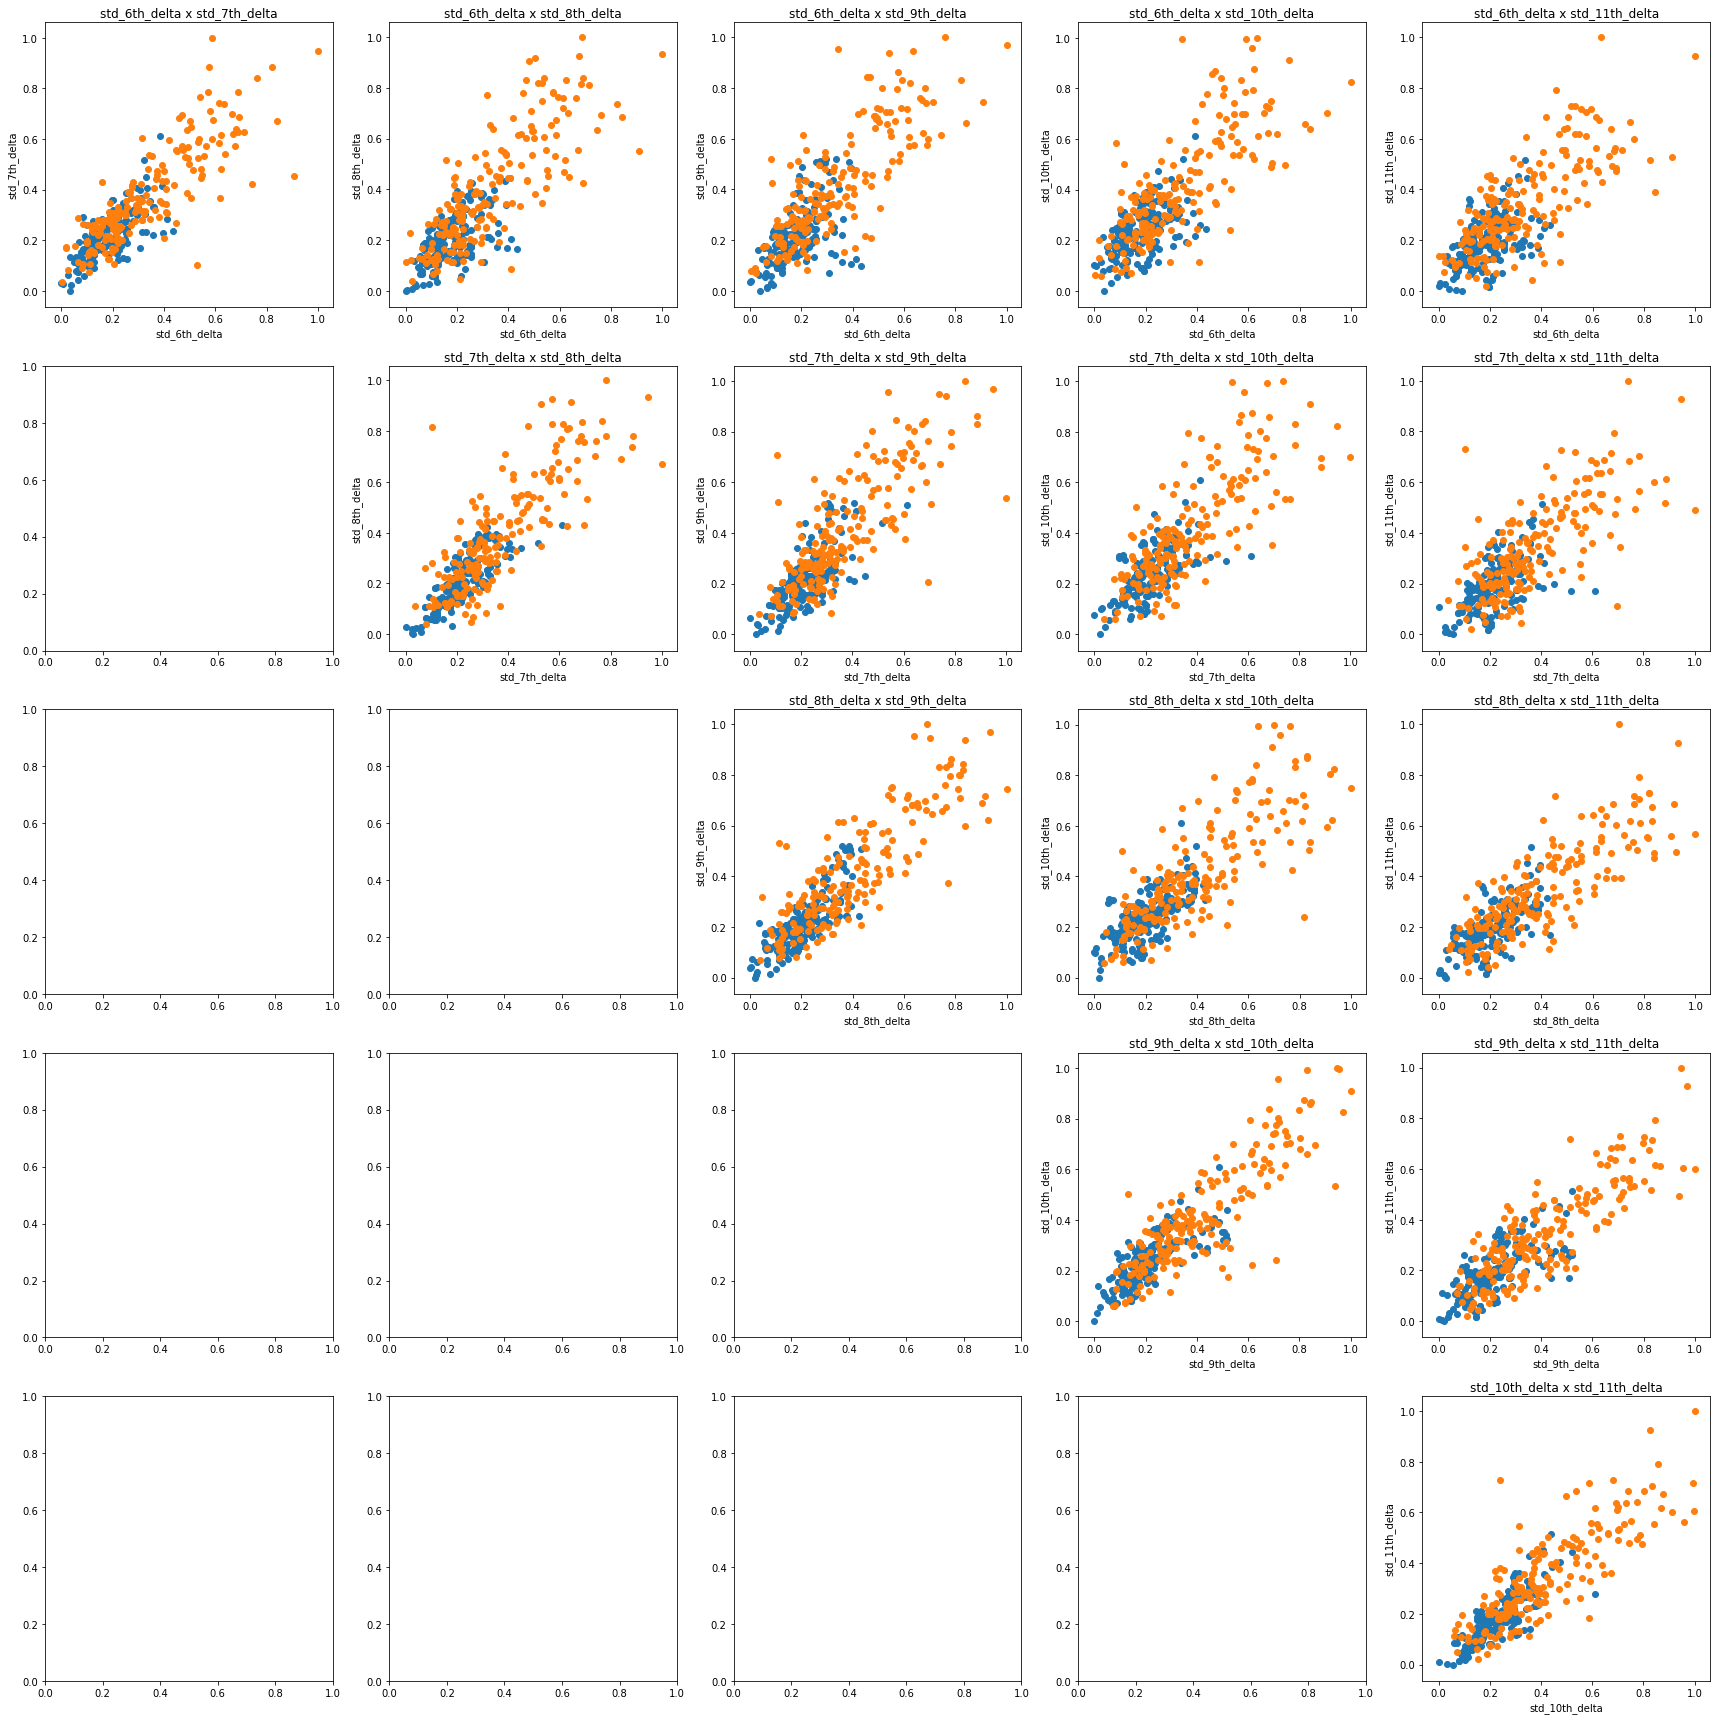

In [26]:
sparsity = selected_df[['std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_11th_delta', 'class']].columns
plt.figure()
rows, cols = len(sparsity)-1, len(sparsity)-1
fig, axs = plt.subplots(rows-1, cols-1, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(sparsity)-1):
    var1 = sparsity[i]
    for j in range(i+1, len(sparsity)-1):
        var2 = sparsity[j]
        graph.scatter_with_two_classes(axs[i, j-1], selected_df[selected_df['class']==0], selected_df[selected_df['class']==1], var1, var2)
fig.tight_layout()
plt.show()

As we mencioned, a high value of these variables looks to be a good indicator for the Parkinson disease, but a low one doesn't help as much.